# Understanding our ecosystem between OLX and Verticals in Europe
**Authors** : Marco Pasin, Jeremy Castan



### Index
1. Understand where users are coming from
2. What's the OLX impact on the replies ?
3. What's the OLX impact on the verticals' adoption ?

### Scope
European mature verticals and their related OLX : Poland, Portugal and Romania.  
Users accepting cookies only (representing around XXXX % of the total users).  
Users who have experienced HTML platforms (desktop and responsive versions).  

### Period
We will focus on users who have experienced the mentionned above during October 2017.

### Data source
Using our internal tracker Hydra via Yamato environment.

## Understand where users are coming from

In [10]:
# import libraries
import numpy as np
import psycopg2
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get the traffic sources via Yamato for october 2017 - I saved it in a .pkl file to gain time.
trafficSources = pd.read_pickle('datasets/trafficSources.pkl')

# Let's check the content of the table directly saved via Yamato (10 first rows)
trafficSources[0:10]

,ecosystem,platform,session_status,traffic_source,sessions,conversions,conversion_rate
0,autovitRO,desktop,new,campaigns,9149,303,3.31
1,autovitRO,desktop,new,continuation of session,20060,191,0.95
2,autovitRO,desktop,new,direct,33007,1164,3.53
3,autovitRO,desktop,new,direct with campaigns,112576,3470,3.08
4,autovitRO,desktop,new,olx,221429,9481,4.28
5,autovitRO,desktop,new,other referrals,6111,234,3.83
6,autovitRO,desktop,new,seo,184436,8753,4.75
7,autovitRO,desktop,new,social media,20650,868,4.20
8,autovitRO,desktop,returning,campaigns,18987,969,5.10
9,autovitRO,desktop,returning,continuation of session,210342,14020,6.67


### Let's have some definition before we continue

##### ecosystem
It's the site concerned

##### platform
Allows us to know if the users is using the desktop version or the responsive one

##### session_status
This is to know if the session is new (a new cookie has been created) or not

##### traffic_source
Traffic source is allocated on the first event of each session  
  
&nbsp;&nbsp;&nbsp;** direct ** : [ORGANIC] - Referrer is empty and there's no campaign in the URL  
  
&nbsp;&nbsp;&nbsp;** direct with campaigns ** : [PAID || ORGANIC] - Referrer is empty but there's a campaign in the URL  
  
&nbsp;&nbsp;&nbsp;** campaigns ** : [PAID] - The URL contains a utm campaign and there's a referrer  
  
&nbsp;&nbsp;&nbsp;** olx ** : [ORGANIC] - The session has been generated thanks to OLX  
  
&nbsp;&nbsp;&nbsp;** seo ** : [ORGANIC] - Coming from Google, Bing or Yahoo in a natural way (no sponsored link)  
  
&nbsp;&nbsp;&nbsp;** social media ** : [ORGANIC] - Coming from Facebook, Twitter or Pinterest in a natural way (no sponsored link)  
  
&nbsp;&nbsp;&nbsp;** other referrals ** : [ORGANIC] - Coming via another site than the ones mentionned above  
  
&nbsp;&nbsp;&nbsp;** continuation of session ** : [ORGANIC] - Starting a new session in the vertical after 30 min of inactivity

&nbsp;&nbsp;&nbsp;** allegro ** : [ORGANIC] - Is only concerning Otomoto. Sessions coming from allegro.pl

##### sessions
Number of sessions realized via each source. A session starts as soon as a first event is fired. A session ends after 30 minuts of inactivity. Sessions are ** not duplicated at midnight ** as in GA or ATI. Sessions are ** not duplicated when a new campaign is counted ** as in GA.

The number of session will obviously be lower than in GA, it is normal.

##### conversions
Number of sessions which experienced a reply during the session. Replies are :
1. Sending a message
2. Showing the phone number
3. Making a call
4. Send a SMS

##### conversion_rate
conversions / sessions * 100, rounded with 2 decimals

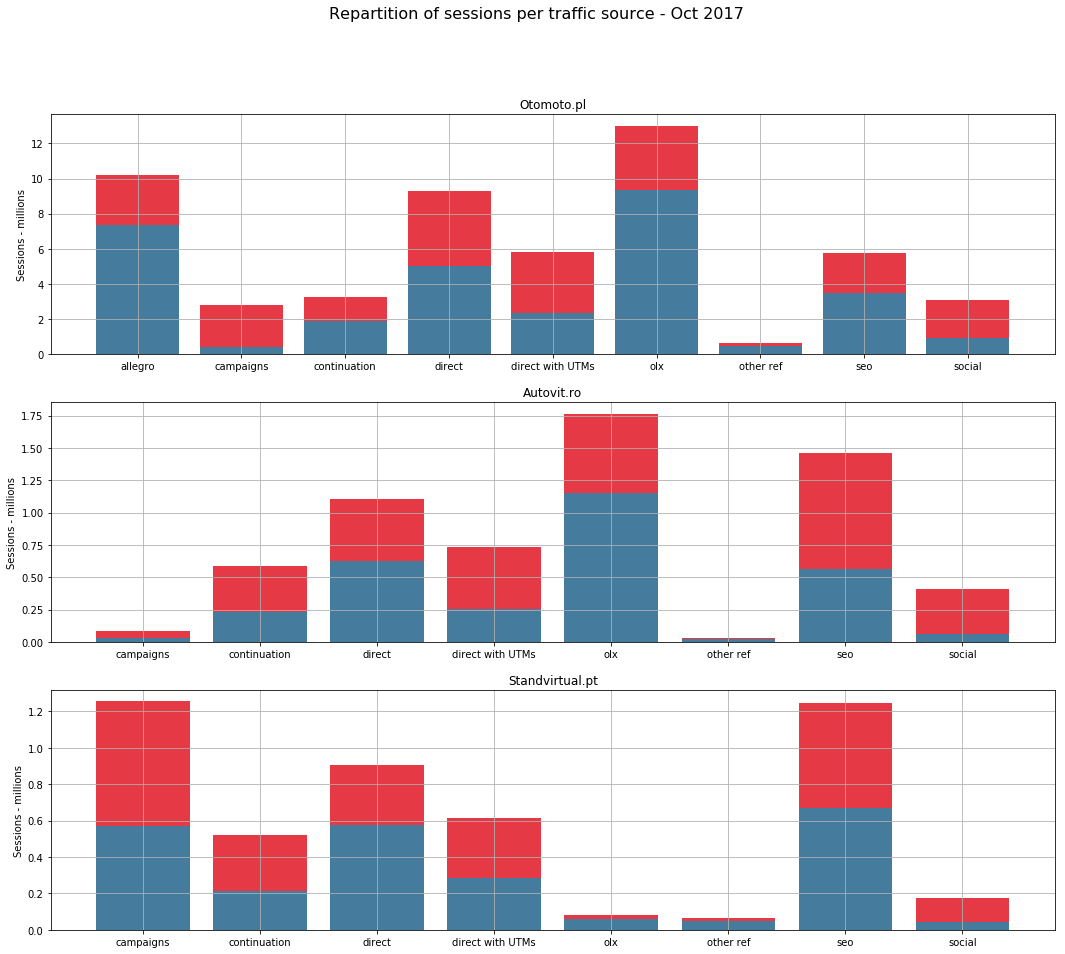

In [17]:
# Let's check the traffic source of each verticals splitted by platform
groupByPlatform = trafficSources[['ecosystem','platform','traffic_source','sessions']].groupby(['ecosystem','platform','traffic_source']).sum()

### Code to create the bar chart per Ecosystem
### Using Matplotlib

# configuration
barPositionOtomoto = [1,2,3,4,5,6,7,8,9]
barLabelsOtomoto = ['allegro','campaigns','continuation','direct','direct with UTMs','olx','other ref','seo','social']
barPosition = [1,2,3,4,5,6,7,8]
barLabels = ['campaigns','continuation','direct','direct with UTMs','olx','other ref','seo','social']
barWidth = 0.8

# data
autovitDsk = groupByPlatform.loc[('autovitRO','desktop')].sessions / 1000000
autovitMob = groupByPlatform.loc[('autovitRO','mobile-html5')].sessions / 1000000
otomotoDsk = groupByPlatform.loc[('otomotoPL','desktop')].sessions / 1000000
otomotoMob = groupByPlatform.loc[('otomotoPL','mobile-html5')].sessions / 1000000
standvirtualDsk = groupByPlatform.loc[('standvirtualPT','desktop')].sessions / 1000000
standvirtualMob = groupByPlatform.loc[('standvirtualPT','mobile-html5')].sessions / 1000000

# chart
fig, axes= plt.subplots(ncols=1,nrows=3, figsize = (18,15))
axes[0].set_title('Otomoto.pl')
axes[0].bar(barPositionOtomoto,otomotoDsk,width = barWidth,color = '#457B9D')
axes[0].bar(barPositionOtomoto,otomotoMob,bottom = otomotoDsk,width = barWidth,color = '#E63946')
axes[0].grid()
axes[0].set_xticks(barPositionOtomoto)
axes[0].set_xticklabels(barLabelsOtomoto)
axes[0].set_ylabel('Sessions - millions')
axes[1].set_title('Autovit.ro')
axes[1].bar(barPosition,autovitDsk,width = barWidth,color = '#457B9D')
axes[1].bar(barPosition,autovitMob,bottom = autovitDsk,width = barWidth,color = '#E63946')
axes[1].grid()
axes[1].set_xticks(barPosition)
axes[1].set_xticklabels(barLabels)
axes[1].set_ylabel('Sessions - millions')
axes[2].set_title('Standvirtual.pt')
axes[2].bar(barPosition,standvirtualDsk,width = barWidth,color = '#457B9D')
axes[2].bar(barPosition,standvirtualMob,bottom = standvirtualDsk,width = barWidth,color = '#E63946')
axes[2].grid()
axes[2].set_xticks(barPosition)
axes[2].set_xticklabels(barLabels)
axes[2].set_ylabel('Sessions - millions')
plt.suptitle('Repartition of sessions per traffic source - Oct 2017',fontsize = 16)
plt.show()